In [1]:
import CalculatedFieldSubroutines as routines
import pandas as pd
import numpy as np
import os
import plotly.express as px

### Read and preprocces data


In [19]:
gmID = '6d2ea45a-c839-11ee-a7fc-dd032dba19e8'


#df_chassis = pd.read_csv(f'./data/chassis/{gmID}.csv')
#df_pose = pd.read_csv(f'./data/best_pose/{gmID}.csv')

df_chassis = pd.read_csv(f'./data/Raw_Data/{gmID}/_apollo_canbus_chassis/{gmID}_apollo_canbus_chassis.csv')
df_pose = pd.read_csv(f'./data/Raw_Data/{gmID}/_apollo_sensor_gnss_best_pose/{gmID}_apollo_sensor_gnss_best_pose.csv')
drive_event = pd.read_csv(f'./data/drive_event/drive_events.csv')

# df_metadata = pd.read_csv(f'./data/metadata/{gmID}.csv')
ads_index = pd.read_csv('./data/ads_data_index.csv')

In [20]:
ads_index = ads_index[ads_index['groupMetadataID'] == gmID]

drive_event = drive_event[drive_event['groupMetadataID'] == gmID]

drive_event.sort_values(by='time', inplace=True)
df_chassis.sort_values(by='time', inplace=True)
df_pose.sort_values(by='time', inplace=True)

# df_chassis['drivingMode'] = np.where(df_chassis['drivingMode'] == 'COMPLETE_AUTO_DRIVE', 'COMPLETE_AUTO_DRIVE','COMPLETE_MANUAL')

routines.BinaryDrivingMode(df_chassis)

In [4]:
df_chassis.head()

,yawRate,drivingMode,topic,msgsize,time,gearLocation,metadataID,throttlePercentage,steeringPercentage,brakePercentage,...,header.timestampSec,wheelSpeed.isWheelSpdRrValid,wheelSpeed.wheelSpdRr,wheelSpeed.isWheelSpdRlValid,wheelSpeed.wheelSpdFr,wheelSpeed.isWheelSpdFrValid,wheelSpeed.wheelSpdRl,wheelSpeed.wheelSpdFl,wheelSpeed.isWheelSpdFlValid,BinaryDrivingMode
18769,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470624378395,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,1.694623e+09,True,44.401196,True,44.401196,True,44.139397,44.244114,True,0
59177,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470644321111,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,1.694623e+09,True,44.401196,True,44.401196,True,44.139397,44.244114,True,0
10028,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470664462647,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,1.694623e+09,True,44.401196,True,44.401196,True,44.139397,44.244114,True,0
81770,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470684316218,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,1.694623e+09,True,44.401196,True,44.401196,True,44.296474,44.348835,True,0
37542,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470705159403,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,1.694623e+09,True,44.401196,True,44.401196,True,44.296474,44.348835,True,0


In [5]:
df_pose.head()

,topic,gpsGlonassUsedMask,time,longitudeStdDev,undulation,numSatsTracked,baseStationId,latitudeStdDev,differentialAge,solType,...,heightMsl,groupMetadataID,longitude,solutionAge,solStatus,msg_type,numSatsInSolution,header.moduleName,header.sequenceNum,header.timestampSec
1374,/apollo/sensor/gnss/best_pose,51,1694623471040511870,0.042291,-35.1,11,MzE5Mg==,0.049374,2.0,NARROW_INT,...,210.311776,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100829,0.0,SOL_COMPUTED,NaN,7,gnss,139,1.694623e+09
1354,/apollo/sensor/gnss/best_pose,51,1694623472046692552,0.055986,-35.1,10,MzE5Mg==,0.075051,3.0,NARROW_INT,...,210.486212,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100697,0.0,SOL_COMPUTED,NaN,9,gnss,140,1.694623e+09
1432,/apollo/sensor/gnss/best_pose,51,1694623473036271165,0.064137,-35.1,9,MzE5Mg==,0.080693,4.0,NARROW_INT,...,210.425923,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100567,0.0,SOL_COMPUTED,NaN,7,gnss,141,1.694623e+09
1451,/apollo/sensor/gnss/best_pose,51,1694623474042779148,0.085414,-35.1,9,MzE5Mg==,0.139743,5.0,NARROW_INT,...,210.383185,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100443,0.0,SOL_COMPUTED,NaN,5,gnss,142,1.694623e+09
454,/apollo/sensor/gnss/best_pose,51,1694623475033571142,0.098462,-35.1,9,MzE5Mg==,0.151905,6.0,NARROW_INT,...,210.218968,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100326,0.0,SOL_COMPUTED,NaN,7,gnss,143,1.694623e+09


In [6]:
ads_index

,count,groupMetadataID,start_time,end_time,nummsgs,filebase,folder,vehilceID,experimentID
8,80,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,1.694620e+18,1.694630e+18,1816742,/Deployment_2_SEOhio/RedRoute/OU Pacifica/1694...,/Deployment_2_SEOhio/RedRoute/OU Pacifica/1694...,OUPacifica,11


In [21]:
drive_event.head()

,groupMetadataID,event,vehicleID,topic,_id,time,header.timestampSec,position.alt_msl,position.latitude,position.longitude,msgsize,metadataID,isReportable,msg_type,type,header.moduleName,header.sequenceNum
1023,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,takeover around corner too close to edgeline,OUPacifica,/apollo/drive_event,4e629bb5-2d95-11ef-9a03-1d2e6c951bc0,1694623806000000000,1.694624e+09,272.1,39.397816,-82.052499,NaN,NaN,NaN,NaN,NaN,NaN,NaN
694,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,takeover too close to edgeline should reduce s...,OUPacifica,/apollo/drive_event,4e629bb6-2d95-11ef-9a03-1d2e6c951bc0,1694623864000000000,1.694624e+09,213.1,39.402747,-82.039370,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1328,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,Riding on centerline when map shows us middle ...,OUPacifica,/apollo/drive_event,4e629bb7-2d95-11ef-9a03-1d2e6c951bc0,1694623916000000000,1.694624e+09,209.5,39.403176,-82.028777,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1190,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,Riding on centerline,OUPacifica,/apollo/drive_event,4e629bb8-2d95-11ef-9a03-1d2e6c951bc0,1694623948000000000,1.694624e+09,207.8,39.400715,-82.022766,NaN,NaN,NaN,NaN,NaN,NaN,NaN
403,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,took turn well but takeover because a car was ...,OUPacifica,/apollo/drive_event,4e629bb9-2d95-11ef-9a03-1d2e6c951bc0,1694624146000000000,1.694624e+09,198.9,39.385320,-81.989746,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Map route


In [8]:
routines.TernaryDrivingModeTransition(df_chassis)
routines.LatLonTotalStdDev(df_pose)
routines.ChassisBestPoseMatchedTime(df_chassis, df_pose)

In [9]:
df_chassis

,yawRate,drivingMode,topic,msgsize,time,gearLocation,metadataID,throttlePercentage,steeringPercentage,brakePercentage,...,wheelSpeed.wheelSpdRr,wheelSpeed.isWheelSpdRlValid,wheelSpeed.wheelSpdFr,wheelSpeed.isWheelSpdFrValid,wheelSpeed.wheelSpdRl,wheelSpeed.wheelSpdFl,wheelSpeed.isWheelSpdFlValid,BinaryDrivingMode,TernaryDrivingModeTransition,ChassisBestPoseMatchedTime
18769,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470624378395,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,44.401196,True,44.401196,True,44.139397,44.244114,True,0,0,1694623471040511870
59177,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470644321111,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,44.401196,True,44.401196,True,44.139397,44.244114,True,0,0,1694623471040511870
10028,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470664462647,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,44.401196,True,44.401196,True,44.139397,44.244114,True,0,0,1694623471040511870
81770,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470684316218,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,44.401196,True,44.401196,True,44.296474,44.348835,True,0,0,1694623471040511870
37542,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470705159403,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,44.401196,True,44.401196,True,44.296474,44.348835,True,0,0,1694623471040511870
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
77858,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333424424763,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,5.076647,18.4,...,12.932896,True,12.880535,True,13.037615,12.880535,True,0,0,1694625333036718029
19790,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333447431377,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,5.076647,18.4,...,12.932896,True,12.880535,True,13.037615,12.880535,True,0,0,1694625333036718029
17097,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333464256979,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,7.892891,18.8,...,12.671096,True,12.618736,True,12.618736,12.514016,True,0,0,1694625333036718029
27684,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333484287645,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,7.892891,18.8,...,12.671096,True,12.618736,True,12.618736,12.514016,True,0,0,1694625333036718029


In [10]:
merged_df = pd.merge(df_chassis, df_pose, on='ChassisBestPoseMatchedTime')
merged_df

,yawRate,drivingMode,topic_x,msgsize_x,time_x,gearLocation,metadataID_x,throttlePercentage,steeringPercentage,brakePercentage,...,groupMetadataID_y,longitude,solutionAge,solStatus,msg_type_y,numSatsInSolution,header.moduleName_y,header.sequenceNum_y,header.timestampSec_y,LatLonTotalStdDev
0,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470624378395,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100829,0.0,SOL_COMPUTED,NaN,7,gnss,139,1.694623e+09,0.065010
1,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470644321111,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100829,0.0,SOL_COMPUTED,NaN,7,gnss,139,1.694623e+09,0.065010
2,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470664462647,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100829,0.0,SOL_COMPUTED,NaN,7,gnss,139,1.694623e+09,0.065010
3,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470684316218,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100829,0.0,SOL_COMPUTED,NaN,7,gnss,139,1.694623e+09,0.065010
4,0,COMPLETE_MANUAL,/apollo/canbus/chassis,133,1694623470705159403,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100829,0.0,SOL_COMPUTED,NaN,7,gnss,139,1.694623e+09,0.065010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92992,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333424424763,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,5.076647,18.4,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.102997,0.0,SOL_COMPUTED,NaN,14,gnss,2001,1.694625e+09,0.020131
92993,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333447431377,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,5.076647,18.4,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.102997,0.0,SOL_COMPUTED,NaN,14,gnss,2001,1.694625e+09,0.020131
92994,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333464256979,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,7.892891,18.8,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.102997,0.0,SOL_COMPUTED,NaN,14,gnss,2001,1.694625e+09,0.020131
92995,0,EMERGENCY_MODE,/apollo/canbus/chassis,134,1694625333484287645,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,7.892891,18.8,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.102997,0.0,SOL_COMPUTED,NaN,14,gnss,2001,1.694625e+09,0.020131


In [11]:
merged_df['drivingMode'] = np.where(merged_df['BinaryDrivingMode'] == 0, "Manual", "Autonomous")
merged_df['TernaryDrivingModeTransition'] = merged_df['TernaryDrivingModeTransition'].astype(str)

In [12]:
merged_df

,yawRate,drivingMode,topic_x,msgsize_x,time_x,gearLocation,metadataID_x,throttlePercentage,steeringPercentage,brakePercentage,...,groupMetadataID_y,longitude,solutionAge,solStatus,msg_type_y,numSatsInSolution,header.moduleName_y,header.sequenceNum_y,header.timestampSec_y,LatLonTotalStdDev
0,0,Manual,/apollo/canbus/chassis,133,1694623470624378395,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100829,0.0,SOL_COMPUTED,NaN,7,gnss,139,1.694623e+09,0.065010
1,0,Manual,/apollo/canbus/chassis,133,1694623470644321111,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100829,0.0,SOL_COMPUTED,NaN,7,gnss,139,1.694623e+09,0.065010
2,0,Manual,/apollo/canbus/chassis,133,1694623470664462647,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100829,0.0,SOL_COMPUTED,NaN,7,gnss,139,1.694623e+09,0.065010
3,0,Manual,/apollo/canbus/chassis,133,1694623470684316218,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100829,0.0,SOL_COMPUTED,NaN,7,gnss,139,1.694623e+09,0.065010
4,0,Manual,/apollo/canbus/chassis,133,1694623470705159403,GEAR_DRIVE,52754be4-c854-11ee-a7fc-dd032dba19e8,9.6,1.408121,0.0,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.100829,0.0,SOL_COMPUTED,NaN,7,gnss,139,1.694623e+09,0.065010
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
92992,0,Manual,/apollo/canbus/chassis,134,1694625333424424763,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,5.076647,18.4,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.102997,0.0,SOL_COMPUTED,NaN,14,gnss,2001,1.694625e+09,0.020131
92993,0,Manual,/apollo/canbus/chassis,134,1694625333447431377,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,5.076647,18.4,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.102997,0.0,SOL_COMPUTED,NaN,14,gnss,2001,1.694625e+09,0.020131
92994,0,Manual,/apollo/canbus/chassis,134,1694625333464256979,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,7.892891,18.8,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.102997,0.0,SOL_COMPUTED,NaN,14,gnss,2001,1.694625e+09,0.020131
92995,0,Manual,/apollo/canbus/chassis,134,1694625333484287645,GEAR_DRIVE,741dd1b6-c869-11ee-a7fc-dd032dba19e8,0.0,7.892891,18.8,...,6d2ea45a-c839-11ee-a7fc-dd032dba19e8,-82.102997,0.0,SOL_COMPUTED,NaN,14,gnss,2001,1.694625e+09,0.020131


### Scatterplot Matrices


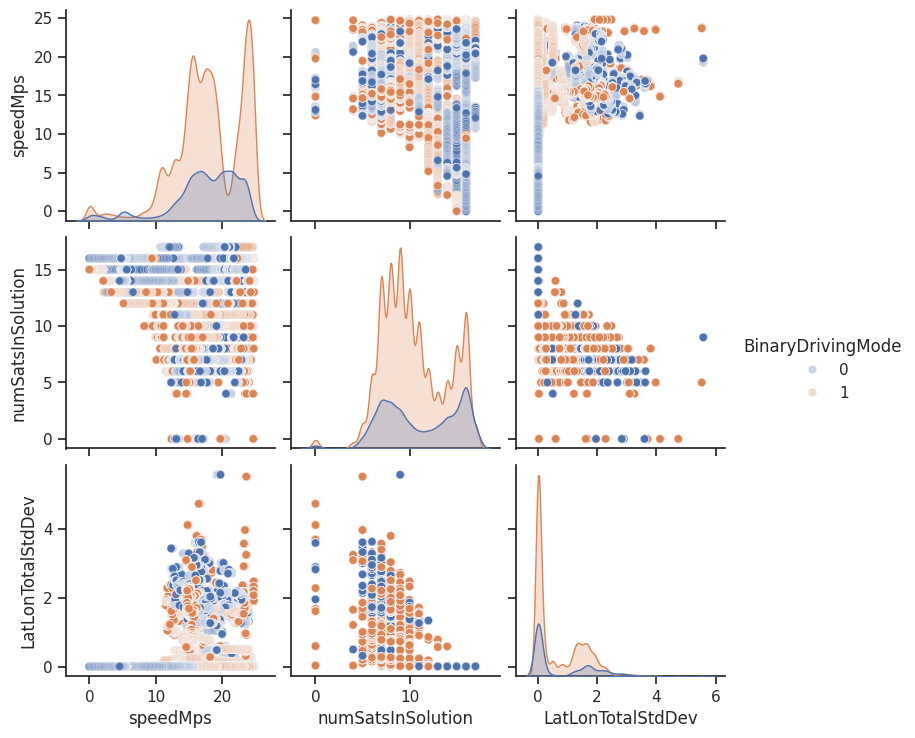

In [24]:
import seaborn as sns
sns.set_theme(style="ticks")

cols = [
    #"drivingMode",
     #"throttlePercentage",
     #"steeringPercentage",
     #"brakePercentage",
    # "steeringRate",
    "speedMps",
    # "signal.turnSignal",
    #"TernaryDrivingModeTransition",
    # "longitudeStdDev",
    # "latitudeStdDev",
    #"differentialAge",
    # "solutionAge",
    "numSatsInSolution",
    # "numSatsTracked",
    "LatLonTotalStdDev",
    "BinaryDrivingMode",
]

i = 92997

merged_df.iloc[:i][cols]

# df = sns.load_dataset("penguins")
#sns.pairplot(merged_df.iloc[:i][cols].sample(i), hue="BinaryDrivingMode", plot_kws={"alpha": 0.3})
sns.pairplot(merged_df.iloc[:i][cols], hue="BinaryDrivingMode", plot_kws={"alpha": 0.3})


correlation_matrix = merged_df[cols].corr()


<Axes: >

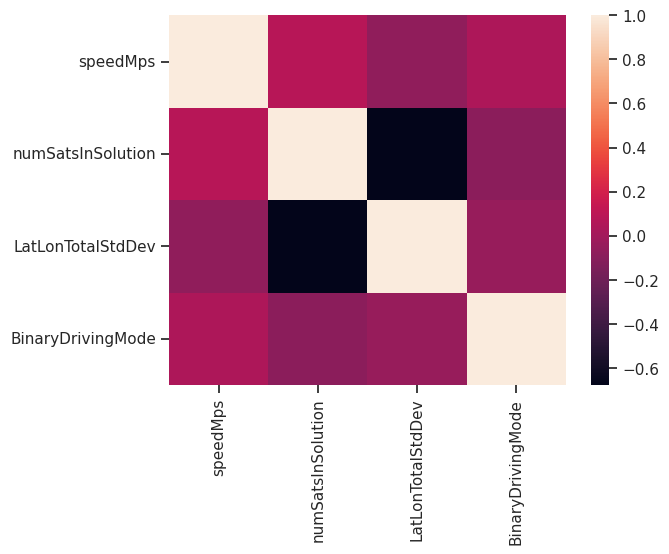

In [25]:
sns.heatmap(correlation_matrix)

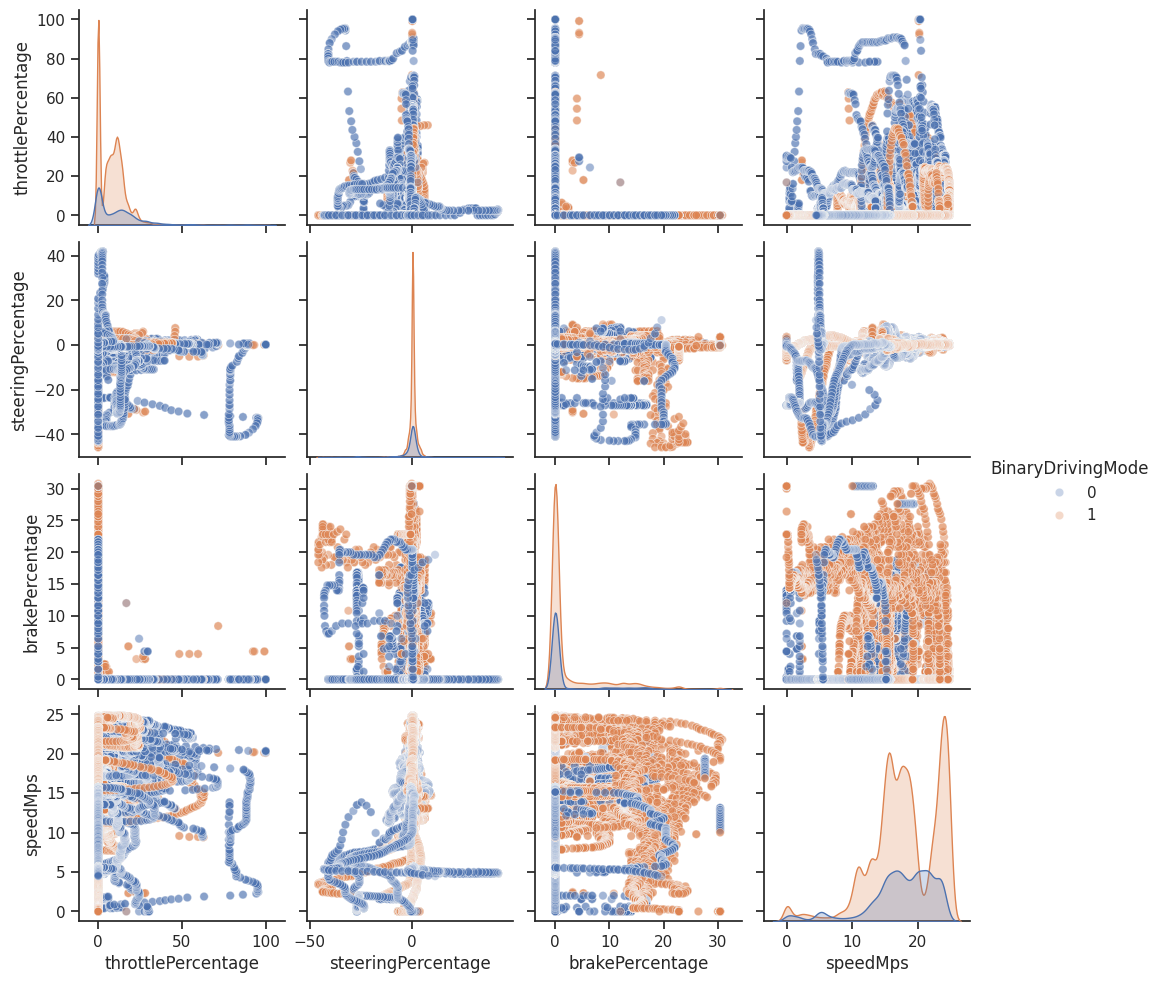

In [22]:
import seaborn as sns
sns.set_theme(style="ticks")

cols = [
    #"drivingMode",
    "throttlePercentage",
    "steeringPercentage",
    "brakePercentage",
    #"steeringRate",
    "speedMps",
    #"signal.turnSignal",
    "BinaryDrivingMode",
    #"TernaryDrivingModeTransition",
    # "longitudeStdDev",
    # "latitudeStdDev",
    #"differentialAge",
    # "solutionAge",
    #"numSatsInSolution",
    # "numSatsTracked",
    #"LatLonTotalStdDev"
]

i = 92997

merged_df.iloc[:i][cols]

# df = sns.load_dataset("penguins")
#sns.pairplot(merged_df.iloc[:i][cols].sample(i), hue="BinaryDrivingMode", plot_kws={"alpha": 0.3})
sns.pairplot(merged_df.iloc[:i][cols], hue="BinaryDrivingMode", plot_kws={"alpha": 0.3})


correlation_matrix = merged_df[cols].corr()


<Axes: >

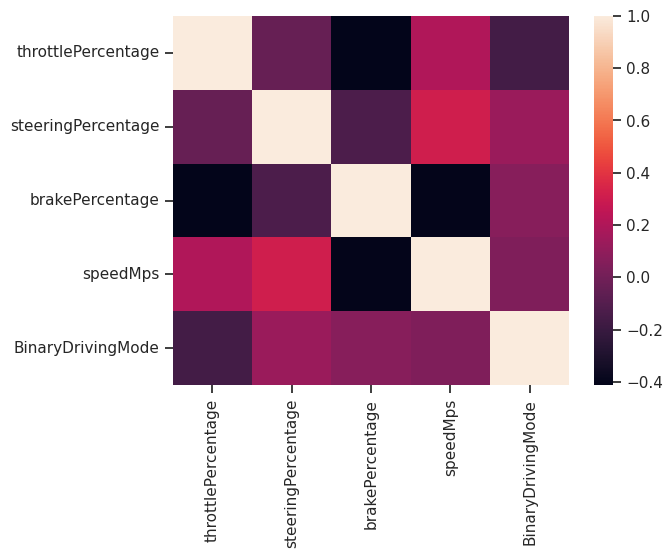

In [23]:
sns.heatmap(correlation_matrix)